In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost
import matplotlib.pyplot as plt
from IPython.display import Image

In [69]:
X_train = pd.read_csv("D:\\chrom download\\R\\Data\\Car\\train_x.csv",index_col=0)
X_val = pd.read_csv("D:\\chrom download\\R\\Data\\Car\\test_x.csv",index_col=0)
y_train = pd.read_csv("D:\\chrom download\\R\\Data\\Car\\train_y.csv",index_col=0)
y_val = pd.read_csv("D:\\chrom download\\R\\Data\\Car\\test_y.csv",index_col=0)


In [72]:
params = {
         'booster': 'gblinear',
         'gamma': 0,
         'learning_rate': 0.05,
         'missing': None,
         'n_estimators': 10,
         'n_jobs': 5,
         'objective': 'reg:linear',
         'random_state': 0,
         'reg_alpha': 0,
         'reg_lambda': 1,
         'scale_pos_weight': 1,
         'seed': 0,
         'silent': True,
         'subsample': 1}

params['eval_metric'] = 'rmse'

In [70]:
d_train = xgboost.DMatrix(X_train, y_train)
d_val = xgboost.DMatrix(X_val, y_val)
watchlist = [(d_train, "train"), (d_val, "valid")]

In [73]:
#train model
model = xgboost.train(params, d_train, num_boost_round=30, evals=watchlist, early_stopping_rounds=10, verbose_eval=10) 

[0]	train-rmse:13.347	valid-rmse:12.7354
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:13.3457	valid-rmse:12.733
[20]	train-rmse:13.3453	valid-rmse:12.7325
[29]	train-rmse:13.3451	valid-rmse:12.7323


In [256]:
data_for_prediction = xgboost.DMatrix(X_val)  # use 1 row of data here. Could use multiple rows if desired
#model.predict(data_for_prediction)
shap_values = model.predict(data_for_prediction,pred_contribs ='TRUE') # show the shap value

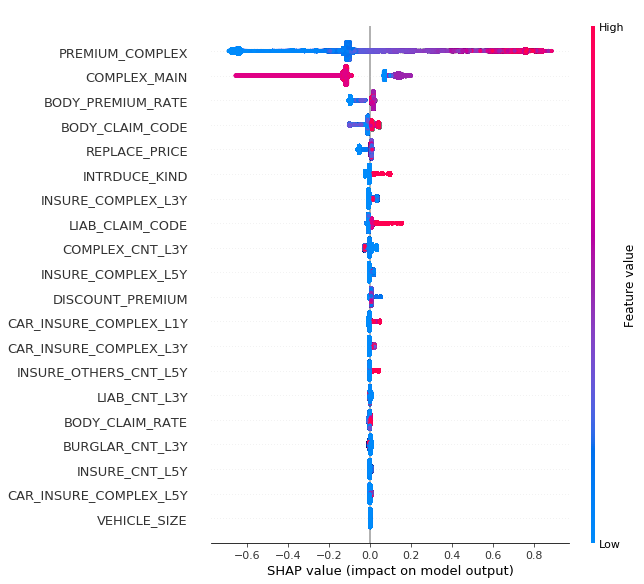

In [222]:
shap.summary_plot(shap_values, X_train)

In [255]:
X_train.iloc[1,]

UNIT_NO                                     NaN
DISCOUNT_PREMIUM                   5.610000e+03
BUSINESS_ORIGIN                             NaN
COPERATE_COMPANY_NO                         NaN
CHANNEL_TYPE                       1.000000e+01
IS_CONTINUE_POLICY_NO              1.000000e+00
IS_BURGLAR                         0.000000e+00
IS_LIAB                            1.000000e+00
IS_PASSENGER                       0.000000e+00
IS_OTHER                           0.000000e+00
CATEGORY_KIND_CNT                  2.000000e+00
INSRNCE_AMOUNT_COMPLEX             3.000000e+04
INSRNCE_AMOUNT_BURGLAR             0.000000e+00
INSRNCE_AMOUNT_LIAB                1.042000e+08
INSRNCE_AMOUNT_PASSENGER           0.000000e+00
INSRNCE_AMOUNT_OTHER               0.000000e+00
INSRNCE_AMOUNT_SUM                 1.042300e+08
PREMIUM_COMPLEX                    3.195000e+03
PREMIUM_BURGLAR                    0.000000e+00
PREMIUM_LIAB                       2.415000e+03
PREMIUM_PASSENGER                  0.000

第85筆 data 預測為 True 的probability: [0.9425344]


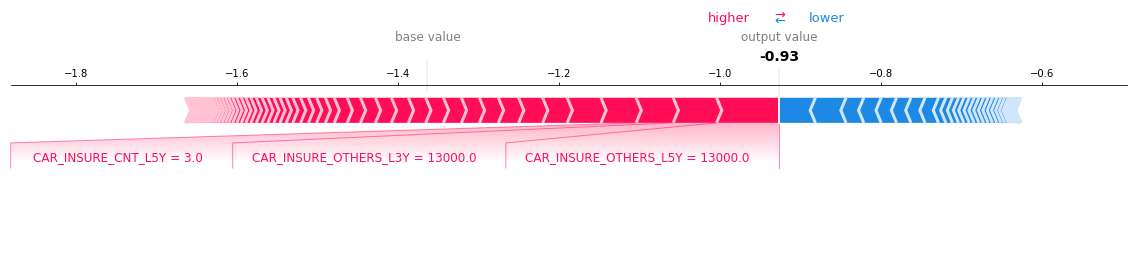

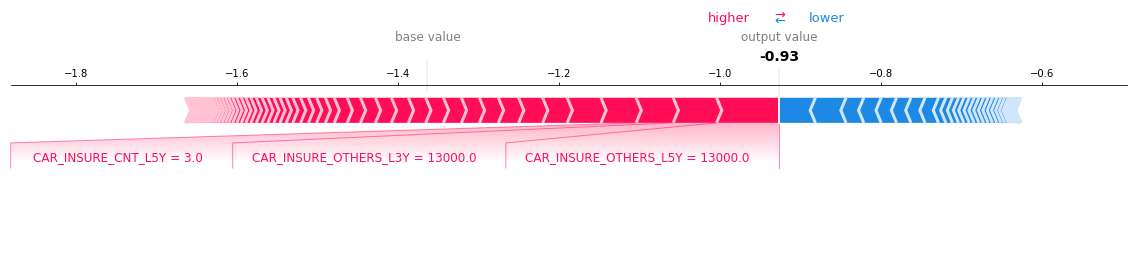

In [257]:
data_for_prediction = xgboost.DMatrix(X_val.iloc[[1],:])  # use 1 row of data here. Could use multiple rows if desired
print(f"第85筆 data 預測為 True 的probability: {model.predict(data_for_prediction)}")
shap.force_plot(explainer.expected_value, shap_values[1,0:234], X_val.iloc[1,:], show=False,matplotlib=True)

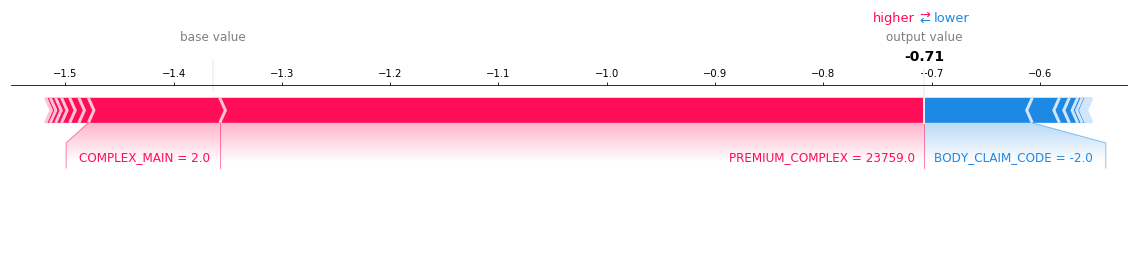

In [48]:
#上面cell的圖!
Image(filename="a.png", width = 800, height = 900)